# Imports

In [1]:
import os               as os
import numpy            as np
import IPython.display  as ipd
import operator         as op
import librosa          as lib

from scipy              import signal       as sig
from scipy.io           import wavfile      as wav
from matplotlib         import pyplot       as plt
from scipy.interpolate  import interp1d     as interpol
from tabulate           import tabulate     as table

import tikzplotlib 

___
# Interpolation Function

This creates an interpolated graph/function and returns the amplitudes of the frequencies passed in

In [2]:
def interpolate(frequencies, amp, freq):

    # ----------------------------------------------------------- Remove negative frequencies and their amplitudes
    positive_freq_indices = np.array(freq) > 0
    amp_pos     = np.array(amp)  [positive_freq_indices]
    freq_pos    = np.array(freq) [positive_freq_indices]

    # ----------------------------------------------------------- Interpolate amplitude
    inter       = interpol  (   freq_pos, 
                                np.abs(amp_pos), 
                                kind        ='linear', 
                                fill_value  ="extrapolate")
    
    # ----------------------------------------------------------- Get interpolated amplitudes for the given frequencies
    interpolated_amplitudes = inter(frequencies)
    
    # ----------------------------------------------------------- Create pairs of frequencies and interpolated amplitudes
    freq_amp_pairs = list(zip(frequencies, interpolated_amplitudes))
    

    graph_inter     = interpol     (freq_pos,       np.abs(amp_pos),     kind='linear',      fill_value="extrapolate")
    graph_lin       = np.linspace  (min(freq_pos),  max(freq_pos),       10000)


    return freq_amp_pairs, inter, graph_inter, graph_lin


___
# Shifting & Scaling

Keeping this function here just in case you want to use it

In [3]:
def shift_and_scale_amplitude(raw_amp, min = 0, max = 3.3):
    """
    Shifts the amplitude array to have a minimum amplitude of 0 and scales it to have a maximum amplitude of 3.3.

    Parameters:
        raw_amp (numpy.ndarray): Raw amplitude array.

    Returns:
        numpy.ndarray: Shifted and scaled amplitude array.
    """
    min_amp = np.min(raw_amp)
    
    # ------------------------------------- Shift Up
    shifted_amp = raw_amp + abs(min_amp) - min
    
    # ------------------------------------- Scale
    max_amp = np.max(shifted_amp)
    scaled_amp = (shifted_amp / max_amp) * max

    # ------------------------------------- Plot
    plt.figure(figsize=(20, 5), facecolor='white')

    plt.subplot (1, 2, 1)
    plt.plot    (raw_amp, label='Raw Graph', color='crimson')
    plt.xlabel  ('Sample Index')
    plt.ylabel  ('Amplitude')
    plt.title   ('Original Plot')
    plt.legend  (loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)
    
    plt.subplot (1, 2, 2)
    plt.plot    (scaled_amp, label='Shifted and Scaled Amplitude', color='royalblue')
    plt.xlabel  ('Sample Index')
    plt.ylabel  ('Amplitude')
    plt.title   ('Shifted/Scaled Plot')
    plt.legend  (loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)
    
    plt.show()

    return scaled_amp

___
# Sample Function

In [4]:
def take_sample (freq, start, num):
    raw_amp, raw_freq = lib.load(file_path, sr=freq)

    sample_amp = raw_amp[start:(start+num)]

    # ---------------------------------------------------  Plot
    plt.figure(figsize=(20, 5), facecolor='white')   
    # --------------------------------------------------- Sub Plot 1 : Entire Audio Signal
    plt.subplot (1, 2, 1)

    plt.title   ('Entire Raw Audio')
    plt.ylabel  ('Amplitude')
    plt.xlabel  ('Sample Index')
    plt.plot    ( raw_amp,                  label = 'Entire Raw Audio',     color = 'royalblue'                 )
    plt.axvspan ( start,     (start+num),   label = 'Sampled Range',        color = 'crimson',      alpha=0.3,  )

    plt.legend  (loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # --------------------------------------------------- Sub Plot 2 : Zoomed In
    plt.subplot (1, 2, 2)

    plt.title   ('Zoomed In Sample range')
    plt.ylabel  ('Amplitude')
    plt.xlabel  ('Sample Index')
    plt.plot    ( raw_amp,                  label = 'Entire Raw Audio',     color = 'royalblue'                 )
    plt.axvspan ( start,     (start+num),   label = 'Sampled Range',        color = 'crimson',      alpha=0.3,  )
    
    plt.xlim    ( start-100, (start+num)+100)

    plt.legend  (loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)
    # --------------------------------------------------- Plot
    
    fig = plt.gcf()
    plt.tight_layout()
    plt.show()
    
    fig.savefig('Sample Area.png')

    return sample_amp, raw_freq

___

# Simulation

This is the files we will be reading :

* data/perfect_sequence_500_ms.wav
* data/noisy_sequence_500_ms.wav

In [5]:
file_path = "data/perfect_sequence_500_ms.wav"

<p>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</p>

## Raw File

This is the raw .wav file reading 

Sample rate:          44100
Numer of Samples:     425088


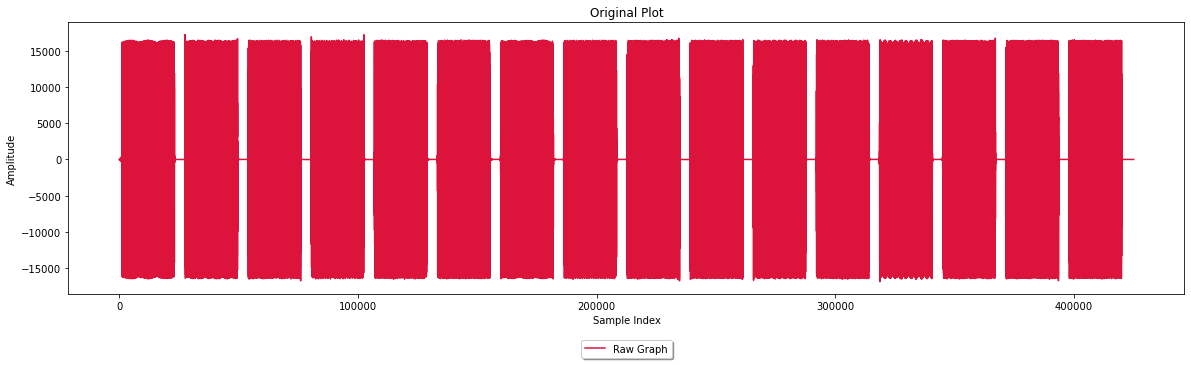

In [6]:
raw_freq, raw_amp = wav.read        (file_path)

print("Sample rate:         "   , raw_freq       )
print("Numer of Samples:    "   , len(raw_amp)   )

plt.figure  (figsize=(20, 5), facecolor='white')
plt.plot    (raw_amp, label='Raw Graph', color='crimson')
plt.xlabel  ('Sample Index')
plt.ylabel  ('Amplitude')
plt.title   ('Original Plot')
plt.legend  (loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)
plt.show()

ipd.display(ipd.Audio(data=raw_amp, rate=raw_freq))

## Sampling

This time the approach to sampling is different, we are reading the file at 6000Hz using librosa as it didn't seem to work before. 

As you can see this results in a jagged wave(due to the inacuracies) but still recognizable

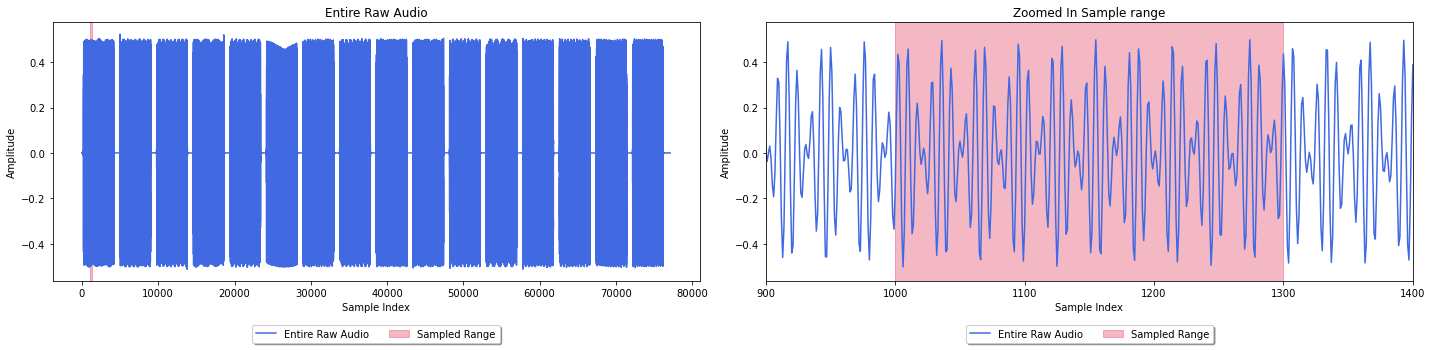

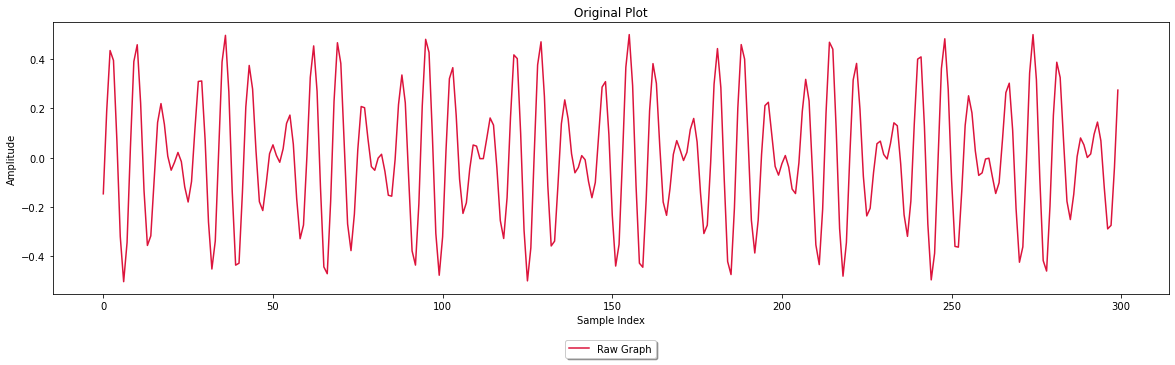

Sample rate:          8000
Numer of Samples:     300


In [14]:
sample_amp, sample_freq = take_sample   (   freq    = 8000,
                                            start   = 1000,
                                            num     = 300
                                        )


plt.figure  (figsize=(20, 5), facecolor='white')
plt.plot    (sample_amp, label='Raw Graph', color='crimson')
plt.xlabel  ('Sample Index')
plt.ylabel  ('Amplitude')
plt.title   ('Original Plot')
fig = plt.gcf()
plt.legend  (loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

plt.show()
fig.savefig('Sample.png')
#print(tikz_code)
#print(fig)
print("Sample rate:         "   , sample_freq       )
print("Numer of Samples:    "   , len(sample_amp)   )

<p>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</p>

## Fourier & Interpolation

Here we calculate the fourier and then interpolate and find the amplitudes for each expected frequency

In [8]:
ft_amp  = np.fft.fft(sample_amp,norm='forward')
ft_freq = np.fft.fftfreq(len(sample_amp), 1/sample_freq)

freq_inter = [697, 770, 852, 941, 1209, 1336, 1477, 1633]

freq_amp_pairs, inter, graph_inter, graph_lin = interpolate (   frequencies     = freq_inter, 
                                                                amp             = ft_amp, 
                                                                freq            = ft_freq
                                                            )

  Freq (Hz)        Amp
------------  ------------
         697    0.00336082
         770    0.00442845
         852    0.00736173
         941    0.113186
        1209    0.0888356
        1336    0.00956338
        1477    0.00495818
        1633    0.00343978


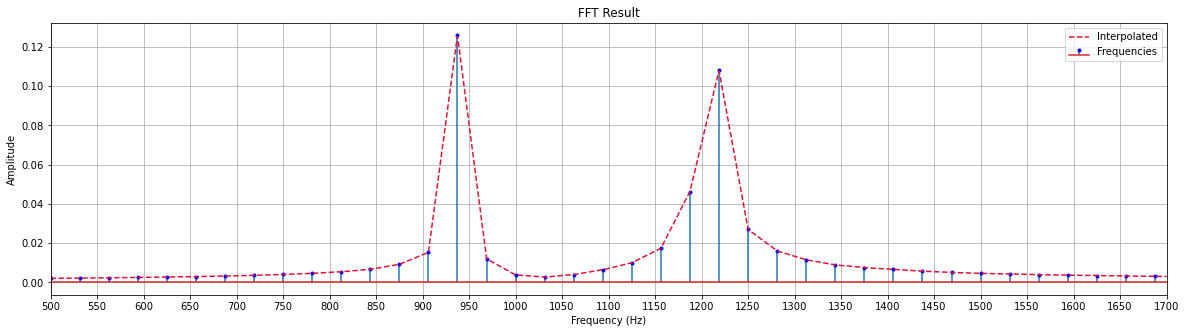

In [9]:


# Print the frequency-amplitude pairs
headers = ["Freq (Hz)", "Amp"]
centered_headers = [title.center(10) for title in headers]  # Centering the titles
print(table(freq_amp_pairs, headers=centered_headers))

# Plotting
plt.figure(figsize=(20, 5), facecolor='white')
plt.stem(   ft_freq,    np.abs      (ft_amp),       label = 'Frequencies',      markerfmt='b.'                              )
plt.plot(   graph_lin,  graph_inter (graph_lin),    label = 'Interpolated',     color = 'crimson',      linestyle='dashed'  )
plt.grid(True)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT Result')
plt.legend()
plt.xlim(500, 1700)
# Increase x-spacing
plt.locator_params(axis='x', nbins=40)  # Adjust nbins as needed

plt.show()

In [10]:
def goertzel(x, freq, sample_rate):
    """
    Goertzel algorithm implementation for calculating the specified frequency component.
    
    Parameters:
        x (numpy.ndarray): Input signal.
        freq (float): Frequency of the component to be calculated.
        sample_rate (float): Sampling rate of the signal.
        
    Returns:
        float: Magnitude of the specified frequency component.
    """
    N = len(x)
    omega = (2.0 * np.pi * (freq / sample_rate))
    coeff = 2.0 * np.cos(omega)
    s_prev = 0
    s_prev2 = 0
    
    for sample in x:
        s = sample + coeff * s_prev - s_prev2
        s_prev2 = s_prev
        s_prev = s
    
    return abs(s_prev2 - coeff * s_prev + s)

In [11]:
component_magnitudes = [goertzel(sample_amp, freq, 6000) for freq in freq_inter]

for freq, amp in zip(freq_inter, component_magnitudes):
    print("Frequency:", freq, "Hz, \tMagnitude:", amp)

Frequency: 697 Hz, 	Magnitude: 5.099594503260597
Frequency: 770 Hz, 	Magnitude: 0.8518579596524649
Frequency: 852 Hz, 	Magnitude: 2.855822700683577
Frequency: 941 Hz, 	Magnitude: 6.9685045605707865
Frequency: 1209 Hz, 	Magnitude: 0.06637850415195137
Frequency: 1336 Hz, 	Magnitude: 0.888303161716388
Frequency: 1477 Hz, 	Magnitude: 0.7298133340058685
Frequency: 1633 Hz, 	Magnitude: 0.27156498487259856


In [12]:
def generate_wave(freq, sample_rate, duration):
    t = np.arange(0, duration, 1/sample_rate)
    wave = np.sin(2 * np.pi * freq * t)
    return wave

def test_goertzel():
    freq = 1000  # Frequency of the wave in Hz
    sample_rate = 6000  # Sampling rate in Hz
    duration = 32 / sample_rate  # Duration of the wave in seconds
    
    wave = generate_wave(freq, sample_rate, duration)
    print(wave)
    magnitude = goertzel(wave, 600, sample_rate)
    
    print("Magnitude of 1000 Hz component:", magnitude)

# Test the goertzel function
test_goertzel()

[ 0.00000000e+00  8.66025404e-01  8.66025404e-01  1.22464680e-16
 -8.66025404e-01 -8.66025404e-01 -2.44929360e-16  8.66025404e-01
  8.66025404e-01  3.67394040e-16 -8.66025404e-01 -8.66025404e-01
 -4.89858720e-16  8.66025404e-01  8.66025404e-01  6.12323400e-16
 -8.66025404e-01 -8.66025404e-01 -7.34788079e-16  8.66025404e-01
  8.66025404e-01  8.57252759e-16 -8.66025404e-01 -8.66025404e-01
 -9.79717439e-16  8.66025404e-01  8.66025404e-01  4.65489580e-15
 -8.66025404e-01 -8.66025404e-01 -1.22464680e-15  8.66025404e-01]
Magnitude of 1000 Hz component: 0.5352331346596308
